## 매개변수 갱신
    매개변수의 최적값을 찾는 것이 최적화(optimization)
    매개변수 공간은 매우 넓고 복잡하여 수식을 풀어 최적의 값을 찾거나 하는 방법은 없음
    심층 신경망에 경우에는 매개변수의 값이 엄청나게 많아져 사태가 더욱 심각

In [1]:
# SGD 함수
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

    SGD는 구현이 쉽고 단순하지만 문제에 따라 비효율적일 때가 있음
    SGD의 단점은 기울기가 달라지는 함수인 비등방성(anisotropy)함수에서는 비효율성을 보여줌
    무작정 기울어진 방향으로 학습을 진행하다보니 비효율성이 발생

In [2]:
import numpy as np


# 모멘텀(Momentum) 함수
class Momentum:
    def __init__(self, lr=0.01, momentom=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None    # 물리학에서 말하는 속도
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeoros_like(val)
                
            for key in params.keys():
                self.v[key] = self.momentum*self.v[key] - self.lr*grad[key]
                params[key] += self.v[key]

        모멘텀의 갱신 경로는 시각화시에 공이 그릇 바닥을 구르듯 움직임
        SGD와 비교하면 '지그재그 정도'가 덜함
        이는 x축의 힘은 아주 작지만 방향은 변하지 않아서 한방향으로 일정하게 가속하기 때문
        거꾸로 y축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않음
        전체적으로 SGD보다 x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어듬

In [3]:
# AdaGrad 함수
# 학습을 진행하며 학습률을 줄여가는 학습률 감소(learning rate decay)를 발전시켜 각각의 매개변수에 맞는 맞춤형 값을 생성
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = h
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
            for key in params.key():
                self.h[key] += grads[key] * grads[key]    # 기존 기울기 값을 제곱하여 계속 더해줌
                
                # h의 루트 역수값을 곱해주어 학습률을 조정
                # 매개변수의 우너소 중 많이 움직인(크게 갱신된) 원소는 학습률이 낮아짐
                params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

    y축 방향은 기울기가 커서 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 감소
    y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어듬

    RMSProp는 과거의 AdaGrad가 어느순간 갱신량이 0이 되는 것을 방지하기 위해 과거의 모든 기울기를 균일하게 더하는 것이 아니라
    먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영하는 방식. 아를 '지수이동평균'이라함

    Adam은 2015년 Momentum과 AdaGrad의 방식을 융합한 방식
    Adam은 갱신 과정이 Momentum과 유사하지만 Momentum보다 공의 좌우 흔들림이 적음
    이는, 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택

## 가중치의 초깃값
    가중치의 초깃값을 무엇으로 설정하느냐가 신경망 학습의 성패를 가를 수 있음

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000, 100)    # 1000개의 데이터
node_num = 100           # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5    # 은닉층이 5개
activations = {}         # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

<Figure size 640x480 with 5 Axes>

    각 측의 활성값들이 0과 1에 치우쳐 있음, 시그모이드 함수는 그 출력이 0 또는 1에 가까워지자 미분값이 0에 다가감
    데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다 사라지며, 이것을 기울기 소실이라 함

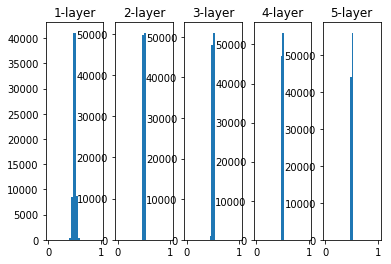

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000, 100)    # 1000개의 데이터
node_num = 100           # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5    # 은닉층이 5개
activations = {}         # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

    표준편차를 0.01로 한 정규분포의 경우 0.5에 값들이 치우침
    이는 0과 1에 치우친 기울기 소실 문제가 일어나지 않지만, 활성값이 치우쳤다는 점에서 표현력 관점에 문제가 있음을 뜻함
    예를들어 뉴런 100개가 거의 같은 값을 출력하면 뉴런 1개와 별반 다를게 없음, 활성값이 치우치면 표현력을 제한한다는 문제가 생김

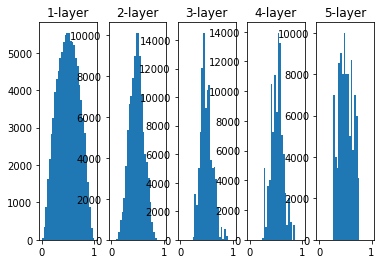

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000, 100)    # 1000개의 데이터
node_num = 100           # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5    # 은닉층이 5개
activations = {}         # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)    # Xavier 초깃값, 표준으로 쓰임
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

    Xavier 초깃값을 사용하면 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼짐
    각 층에 흐르는 데이터는 적당히 퍼져 있으므로, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 진행 됨

    ReLU에 경우, 음의영역이 0이므로 더 넓게 분포 시키기 위해서 가중치 초깃값을 1/sqrt(2*n)로 사용, 이를 He초깃값이라 함

## 배치 정규화
    2015년에 제안된 기법이며, 각 층이 활성화를 적당히 퍼뜨리도록 강제하는 것이 배치 정규화의 출발점
    학습을 빨리 진행 할 수 있음
    초깃값에 크게 의존하지 않음
    오버피팅을 억제

## 오버피팅
    신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태
    매개변수가 많고 표현력이 높은 모델에서 주로 발생
    훈련 데이터가 적은 모델에서 주로 발생

#### 가중치 감소
    큰 가중치에 그에 상응하는 큰 패널티를 부과하여 오버피팅을 억제 (가중치 매개변수의 값이 커서 오버피팅이 발생하는 경우가 많으므로)
    L2 Norm(루트를 씌운 가중치 제곱의 합)을 손실함수에 더함으로써, 가중치가 커지는 것을 억제
    L1 Norm(가중치 절댓값의 합), L무한대 Norm(각 원소의 절댓값 중 가장 큰 값)을 사용 할 수도 있음
    일반적으로 L2 Norm을 사용

#### 드롭아웃
    신경망이 복잡해지면, 가중치 감소만으로 오버피팅에 대응이 어려움
    드롭아웃은 뉴런을 임의로 삭제하며 학습을 진행함
    Train시에는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하며, Test시에는 모든 뉴런의 신호를 전달

In [7]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

###### Note: 기계학습에서는 개별적으로 학습시킨 여러 모델의 출력을 평균 내어 추론하는 방식인 앙상블 학습을 애용. 앙상블 학습은 드롭아웃과 밀접하며, 드롭아웃이 학습 때 뉴런을 무작위로 삭제하는 행위를 매번 다른 모델을 학습시키는 것으로 해석 할 수 있음. 그리고 추론 때는 뉴런의 출력에 삭제한 비율(이를테면 0.5 등)을 곱함으로써 앙상블 학습에서 여러 모델의 평균을 내는 것과 같은 효과를 얻음

## 적절한 하이퍼파라미터의 값
    하이퍼파라미터의 값은 모델의 성능을 좌지우지 하는 중요한 값
    하이퍼파라미터 조정을 위해서는 Test데이터가 아닌 Validation Data를 사용
    Train Data: 매개변수 학습
    Validation Data: 하이퍼파라미터 성능 평가
    Test Data: 신경망의 범용 성능 평가

In [8]:
from master.dataset.mnist import load_mnist
from master.common.util import shuffle_dataset


(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 섞음
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.2
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

       범위를 조금씩 줄이려면 우선 대략적인 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터 값을 샘플링 후, 정확도를 평가
       신경망에 하이퍼파라미터 최적화에서는 그리드 서치 같은 규칙적인 탐색보다 무작위 샘플링 좋은 결과를 가져 옴
       하이퍼파라미터에 최적에는 며칠에서 몇 주이상 오랜 시간이 걸림
       대략적으로 지정하는 것이 효과적이며 실제로도 0.001에서 1000사이와 같이 10의 거듭제곱(로그 스케일) 단위로 범위 지정
       학습을 위한 에폭을 작게 하여, 1회 평가에 걸리는 시간을 단축시키는 것이 효율적